# Too Many SO(3)


In [250]:
%matplotlib inline
# %matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
# https://quaternion.readthedocs.io/en/latest/
# conda install -c conda-forge quaternion
# pip install numba
import quaternion

In [251]:
def skew_symm(a):
    return np.array([
        [0, -a[2], a[1]],
        [a[2], 0, -a[0]],
        [-a[1], a[0], 0]
    ])

def rev_skew_symm(a):
    return np.array([-a[1][2], a[0][2], -a[0][1]])

def prepare_plot(ax):
    # plot sphere
    # np.mgrid[start:end:x], if x is a complex number, 
    # it denotes the number of steps
    ax.set_box_aspect([1, 1, 1])
    u, v = np.mgrid[0:2*np.pi:40j, 0:np.pi:20j]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax.plot_wireframe(x, y, z, color="gray", lw=0.5)


def rand_rotation():
    u = np.random.uniform(-1, 1, 3)
    u = u / np.linalg.norm(u)
    v = np.random.uniform(-1, 1, 3)
    v = v / np.linalg.norm(v)

    w1 = u
    w2 = v - np.dot(u, v) * u
    w2 = w2 / np.linalg.norm(w2)
    w3 = np.cross(w1, w2)
    w = np.array([w1, w2, w3])
    return w

## Random SO3

*Reference: 2018 ICML - Explorations in Homeomorphic Variational Auto-Encoding*

对于一个 $\mathbf{R} \in \mathrm{SO}(3)$，符合：

$$
\mathbf{R} \mathbf{R}^\mathrm{T} = \mathbf{I}
$$

任意采样两个单位向量，可以构造一个 $\mathrm{SO}(3)$。

$$
\mathcal{S}^2 \times \mathcal{S}^2 \rightarrow \mathrm{SO}(3) \\
\mathrm{where}~\mathcal{S}^2 \equiv \{\|\mathbf{x}\|=1, \mathbf{x} \in \mathbb{R}^{n+1}\}
$$

*Reference: https://en.wikipedia.org/wiki/N-sphere*

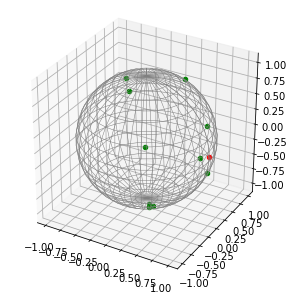

In [252]:
p = np.array([1., 0., 0.])

plt.figure(figsize=(5, 5))
ax = plt.axes(projection='3d')
prepare_plot(ax)
ax.scatter3D([p[0]], [p[1]], [p[2]], c='r')

for _ in range(10):
    R = rand_rotation()
    p2 = R @ p
    ax.scatter3D([p2[0]], [p2[1]], [p2[2]], c='g')


## Visualization of SO(3)

- 从矩阵的形式看，$\mathrm{SO}(3)$ 的 column vector 建模的是旋转后的坐标系。
- 四元数和李代数建模的是，$\mathrm{SO}(3)$ 作为某个函数作用于某个点时，旋转轴和角度。或者说，坐标系本身从标准坐标 $x=(1,0,0), y=(0, 1, 0),z=(0, 0, 1)$ 旋转到新坐标时，旋转轴和角度。

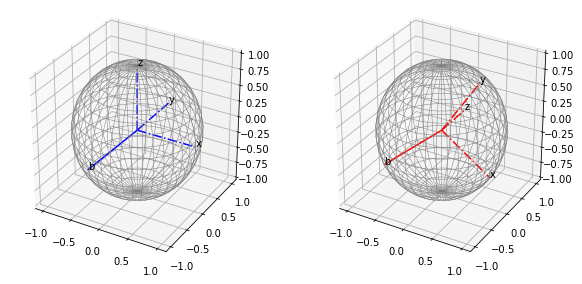

In [253]:
b1 = np.random.randn(3)
b1 = b1 / np.linalg.norm(b1)

plt.figure(figsize=(10, 5))

for i, (R, c) in enumerate([
        (np.eye(3), 'b'), 
        (rand_rotation(), 'r')
    ]):
    ax = plt.subplot(1, 2, i + 1, projection="3d")
    prepare_plot(ax)

    for i in range(3):
        ax.plot3D([0,  R[0][i]],  [0,  R[1][i]], [0,  R[2][i]],  color=c, ls='-.')
        ax.text(R[0][i], R[1][i], R[2][i], 'xyz'[i])
    
    b2 = R @ b1
    ax.plot3D([0, b2[0]], [0, b2[1]], [0, b2[2]], color=c, ls='-')
    ax.text(b2[0], b2[1], b2[2], 'b')


Text(0.5, 0.92, 'Lie Algebra')

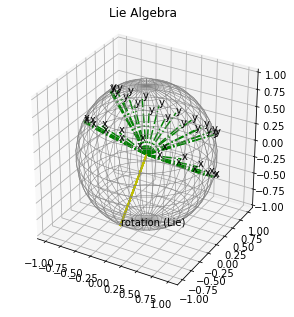

In [254]:
b = np.array([1.0, 0.0, 0.0])
a = np.random.randn(3)
a = a / np.linalg.norm(a)
askew = skew_symm(a)


plt.figure(figsize=(5, 5))
ax = plt.axes(projection="3d")
prepare_plot(ax)

for t in range(20):
    theta = t / 20 * 6.28
    R = np.eye(3) + np.sin(theta) * askew + (1 - np.cos(theta)) * askew @ askew
    for i in range(2):
        ax.plot3D([0,  R[0][i]],  [0,  R[1][i]], [0,  R[2][i]],  color='g', ls='-.')
        ax.text(R[0][i], R[1][i], R[2][i], 'xyz'[i])
    
    ax.plot3D([0,  a[0]],  [0,  a[1]], [0,  a[2]],  color='y')
ax.text(a[0], a[1], a[2], 'rotation (Lie)')
ax.set_title("Lie Algebra")

## Quaternion

*Reference: https://en.wikipedia.org/wiki/Quaternions_and_spatial_rotation*

Given a vector,

$$
\mathbf{p} = p_x \mathbf{i} + p_y \mathbf{j} + p_z \mathbf{k}
$$

A rotation of angle $\theta$ around the **unit** axis $(u_x, u_y, u_z)$ can be represented by a quaternion:

$$
\mathbf{q} = \cos \frac{\theta}{2} + \sin \frac{\theta}{2} (u_x \mathbf{i} + u_y \mathbf{j} + u_z \mathbf{k})
$$

Note that the quaternion is a unit quaternion, whose inverse is its conjugate ($\mathbf{q}^{-1}=\mathbf{q}^*$).

The rotated vector is:
$$
\mathbf{p}' = \mathbf{q} \mathbf{p} \mathbf{q}^{-1}
$$

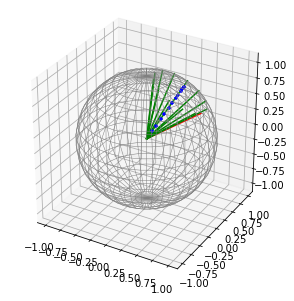

In [255]:
u = np.random.rand(3)
u = u / np.linalg.norm(u)
p = np.quaternion(0, u[0], u[1], u[2])

plt.figure(figsize=(5, 5))
ax = plt.axes(projection='3d')
prepare_plot(ax)
ax.plot3D([0, p.x], [0, p.y], [0, p.z], c='r')
    
u = np.random.rand(3)
u = u / np.linalg.norm(u)
for theta in np.arange(0.5, 2 * np.pi, 0.5):
    c, s = np.cos(theta / 2), np.sin(theta / 2)
    q = np.quaternion(c, s * u[0], s * u[1], s * u[2])
    p2 = q * p * q.conjugate()
    ax.scatter3D([q.x], [q.y], [q.z], c='b', marker='+')

    ax.plot3D([0, p2.x], [0, p2.y], [0, p2.z], c='g')

## Lie Group/Algebra

*Reference: 2018 - A Micro Lie Theory for State Estimation*

Rodrigues Formula：从李代数到李群 $\mathfrak{so}(3) \rightarrow \mathrm{SO}(3)$

构造 skew-symmetric matrix 可以得到一个 $\mathbf{a} \times \mathbf{b}$ 的矩阵运算形式：

$$
\mathbf{a} \times \mathbf{b} = [\mathbf{a}]_\times \mathbf{b}
$$

注意：
- ❌ 旋转轴 $\mathbf{a}$ 垂直于被旋转的 $\mathbf{b}$
- ✅ $\mathbf{a}$ 垂直于 $\mathbf{b}$ 的末端画出的圈
- ✅ $[\mathbf{a}]_\times \mathbf{b}$ 垂直于 $\mathbf{a}$ 和 $\mathbf{b}$

0.6585237714437382
0.0
0.0


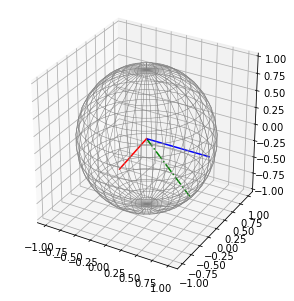

In [256]:
plt.figure(figsize=(5, 5))
ax = plt.axes(projection='3d')
prepare_plot(ax)

b = np.array([1.0, 0.0, 0.0])
a = np.random.randn(3)
a = a / np.linalg.norm(a)
R = skew_symm(a)
Rb = R @ b
ax.plot3D([0,  a[0]],  [0,  a[1]], [0,  a[2]],  color='g', ls='-.')
ax.plot3D([0,  b[0]],  [0,  b[1]], [0,  b[2]],  color='b')
ax.plot3D([0, Rb[0]],  [0, Rb[1]], [0, Rb[2]],  color='r')

print(np.dot(a, b))
print(np.dot(a, Rb))
print(np.dot(b, Rb))

### exp-map

从 $\mathfrak{so}(3)$ 到 $\mathrm{SO}(3)$：

$$
\exp(\mathbf{w}) \equiv \exp(\mathbf{u}\theta) = \mathbf{I} + \sin \theta [\mathbf{u}]_\times + (1 - \cos \theta) [\mathbf{u}]_\times^2
$$

其中，$\textbf{w}$ 长度代表旋转角度 $\theta$，方向代表旋转轴。$\mathbf{u}$ 是 3-vector，也就是 unit vector。

右手定则，围绕 $\textbf{u}$ 逆时针旋转。

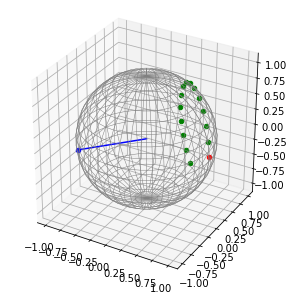

In [257]:
plt.figure(figsize=(5, 5))
ax = plt.axes(projection='3d')
prepare_plot(ax)

x_i = np.array([1.0, 0.0, 0.0])

ax.scatter3D(x_i[0], x_i[1], x_i[2], color='r')

w = np.random.normal(size=3)
u = w / np.linalg.norm(w)

ax.plot3D([0, u[0]], [0, u[1]], [0, u[2]], color='b')
ax.scatter3D(u[0], u[1], u[2], color='b')

for i in range(1, 15):
    t = (2 * np.pi) * i / 20
    R = np.eye(3) + np.sin(t) * skew_symm(u) + (1 - np.cos(t)) * (skew_symm(u) @ skew_symm(u))
    x_wi = R @ x_i
    ax.scatter3D(x_wi[0], x_wi[1], x_wi[2], color='g')

### log-map

从 $\mathrm{SO}(3)$ 到 $\mathfrak{so}(3)$：

$$
\begin{aligned}
\mathbf{R} & \in \mathrm{SO}(3) \\
\theta & = \arccos \frac{\mathrm{tr}(\mathbf{R}) - 1}{2} \\
\ln \mathbf{R} & = \frac{\theta}{2\sin \theta} \cdot (\mathbf{R} - \mathbf{R}^\mathrm{T})
\end{aligned}
$$

得到的 $\mathbf{w}$ 中，方向代表旋转轴，长度代表旋转角度。

- 李代数的 $t$ 增长，李群会产生周期性变化，一圈又一圈，exp-map 是连续的。
- 一个李群可能对应不同的李代数，但是 $\arccos$ 只会选择某个单位周期内的值，因此 log-map 是会出现突变的（也就是类似于 $\pi/2$ 突变到 $-\pi/2$）。

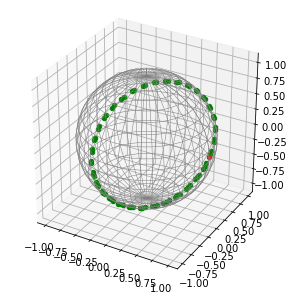

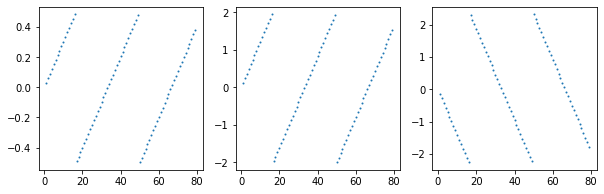

In [258]:
def log_map(so3):
    theta = np.arccos((np.trace(so3) - 1)/2)
    wskew = theta / (2 * np.sin(theta)) * (so3 - so3.T)
    w = rev_skew_symm(wskew)
    return w

def exp_map(w):
    theta = np.linalg.norm(w, 2)
    u = w / theta
    uskew = skew_symm(u)
    R = np.eye(3) + np.sin(theta) * uskew + (1 - np.cos(theta)) * uskew @ uskew
    return R

plt.figure(figsize=(5, 5))
ax = plt.axes(projection='3d')
prepare_plot(ax)

x_i = np.array([1.0, 0.0, 0.0])

ax.scatter3D(x_i[0], x_i[1], x_i[2], color='r')

w = np.random.normal(size=3)
w = w / np.linalg.norm(w)

R = rand_rotation()
w = log_map(R)

ts = []
results = []
for i in range(1, 80):
    R = exp_map(w * (2 * np.pi) * i / 80)
    x_wi = R @ x_i
    ax.scatter3D(x_wi[0], x_wi[1], x_wi[2], color='g')

    w2 = log_map(R)
    ts.append(i)
    results.append(w2)
plt.figure(figsize=(10, 3))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(ts, np.array(results).T[i], s=1)

In [259]:
R = rand_rotation()

# generate axis by log-map in Lie Algebra
w = log_map(R)
u = w / np.linalg.norm(w, 2)

# generate axis by quaternion
q = quaternion.from_rotation_matrix(R)
theta = np.arccos(q.w) * 2

print([q.x / np.sin(theta / 2), q.y / np.sin(theta / 2), q.z / np.sin(theta / 2)])
print(u)

[-0.12364373458911862, 0.20561891413411706, 0.9707899304417834]
[-0.12364373  0.20561891  0.97078993]


## Generate SO(3)

最简单的 uniform 采样，比如使用多元 vMF 或者多元 Gaussian 就行。

这里我们主要讨论如何得到 uniform 地将球面分块做成网格。



### 球面极坐标

一种做法是使用球面坐标 $\theta$ 和 $\phi$：

- 把球面先按高度（z 轴）切成无穷份，每个环相对 xy 平面的夹角为 $\phi$，这个环的半径是 $r \cos \phi$。
- 再把环切成无穷份，每份相对 x 轴的夹角是 $\theta$。
- 得到的是一个球面的微元，这个微元的高是 $r \cdot d\phi$，宽是 $r \cos \phi \cdot d\theta$

因此球面微元的面积是：

$$
r^2 \cos \phi  \cdot d \phi \cdot \cos \theta = r^2 \cdot d\phi \cdot d\sin \theta
$$

为了均匀采样，需要：

$$
\phi \sim \mathrm{Uniform}(-\pi/2, \pi/2) \\
\sin \theta \sim \mathrm{Uniform}(0, 2\pi) \\
$$

也就是：

$$
\phi \sim \mathrm{Uniform}(-\pi/2, \pi/2) \\
u \sim \mathrm{Uniform}(0, 2\pi) \\
\theta = \arcsin u\\
$$

其实按照这种办法采点是没问题的，但是分网格并不好，会出现“越靠近赤道纬线越密集，越靠近南极纬线越稀疏”的情况，每个 patch 的面积的确比较相似，但是点和点之间的距离并不相等。



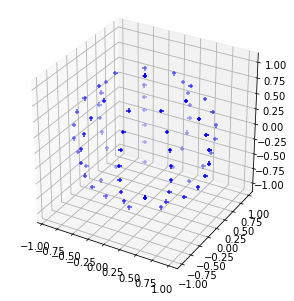

In [260]:
%matplotlib inline

plt.figure(figsize=(5, 5))
ax = plt.axes(projection='3d')
ax.set_box_aspect([1, 1, 1])
# prepare_plot(ax)

N_theta, N_phi = 10j, 10j
theta = np.mgrid[0.0: 2 * np.pi: N_theta]
u = np.mgrid[-1:1: N_phi]
phi = np.arcsin(u)
x = np.outer(np.cos(phi), np.cos(theta)).ravel()
y = np.outer(np.cos(phi), np.sin(theta)).ravel()
z = np.outer(np.sin(phi), np.ones_like(theta)).ravel()
ax.scatter(x, y, z, c='b', marker='+', s=20)

### 斐波那契球面采样
另一种做法是斐波那契球面采样，会出现真正意义上“不同点之间的距离近似相等”。


*Reference: https://stackoverflow.com/questions/9600801/evenly-distributing-n-points-on-a-sphere/*


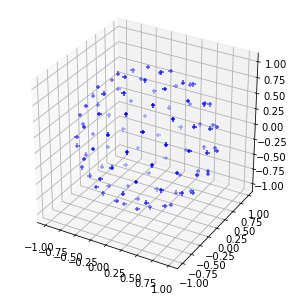

In [261]:
plt.figure(figsize=(5, 5))
ax = plt.axes(projection='3d')
ax.set_box_aspect([1, 1, 1])
# prepare_plot(ax)

N = 100
n = np.mgrid[1:N+1:1]
z = (2 * n - 1) / N - 1
x = np.sqrt((1 - z ** 2)) * np.cos(2 * np.pi * n * 0.618)
y = np.sqrt((1 - z ** 2)) * np.sin(2 * np.pi * n * 0.618)
ax.scatter(x, y, z, c='b', marker='+', s=20)
